# Week 06: Pre-Class Assignment: <br> Numerical Methods in optimization

### <p style="text-align: right;"> &#9989; Kyle Taft


### Goals for this week's pre-class assignment

In this Pre-Class Assignment you are going to use implement newton's method for optimizing models in the context of machine learning. The main learning goals are:

* learn some useful methods in Python,
* practice making nice plots,
* code newton's method,
* code a stochastic gradient optimizer,

Total number of points: **29 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.

## Part 0: Decide on a Preliminary Project (0 Points)

In the HW next week you will write a preproposal on your project. It's time to mostly finalize your project. You will write a one-page (minimum, not maximum) preproposal that will be reviewed by your classmates with feedback returned to you. There is nothing you need to do right now except:
* be sure you have a project in mind by next week,
* be ready to write a preproposal on it, which will include a discussion of all of the steps in Appendix B.

Once you get feedback from your classmates, which takes place the following week, you will have one week to write your final proposal.

More information on what needs to go into your proposal will be given the next HW. But, roughly for now:
* you need to know what data you will use
* you need to know what you will get out of that data
* you will need to use 5-15 different algorithms (e.g., all of the `sklearn` classifiers or many neural network architectures; it is common in ML to literally _use every possible method_, and `sklearn` makes it easy to do this)
* a rigorous approach to training, testing and validation
* a rigorous treatment of hyperparameter tuning
* a serious exploration of feature engineering

More on this next week! And, when we cover chapters 2 and 4 of the textbook, all of this will be very clear. This is just a warning that this is coming!

Be sure to review Appendix A of the textbook to get an idea of the size and scope of the project.

If you don't have a project already in mind, I recommend [reading websites like this one](https://data-flair.training/blogs/machine-learning-project-ideas/) to brainstorm some ideas. Your project should hit the items on the list above and be roughly in the intermediate to advanced level as defined in that website.

---
<!-- ![hidden_humor](https://imgs.xkcd.com/comics/convincing.png) -->

## Part 1: Square Root Using Only Simple Math Operations (10 points)

Lucky you, upon completion of your degree you are hired at a start-up based in beautiful Santa Fe, New Mexico. They have invented a programming language specific to machine learning that operates on a quantum computer. It's still early days, so this new language has no math libraries; in particular, it is not possible to easily find the square root of a number; however, there is currently capability for basic operations like addition, subtraction, multiplication and division. Your task is to write a function that returns the square root of a number, **using only these simple mathematical operations**.

Here is the idea. You have a number $N$ and you want to know its square root, which we can call $x$. This question can be written as

$$ \sqrt{N} = x.$$

This can _also_ be written as

$$f(x) = 0,$$
$$f(x)  = x^2 - N.$$

If we can find the root of $f(x)$ for a given $N$, we have the square root. 

&#9989; **Task 1.1: (5 points)** Write a function that returns the square root of a number using Newton's Method. Remember you can only use the four basic operations **addition, substraction, multiplication, and division**.


### Work:

By using Newton's method, we can find the minimum of a function by using the following equation:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In this case we solve the f(x) above to get the following:

$$x_{n+1} = x_n - \frac{x_n^2 - N}{2x_n}$$

In [33]:
# Put your code here
import numpy as np
N = 20
step = 4

def next_step(current_guess, N):
    return current_guess - (current_guess**2 - N) / (2 * current_guess)
Xs = [step]
error = [abs(step-np.sqrt(N))]
for i in range(10):
    step = next_step(step, N)
    error.append(abs(step-np.sqrt(N)))
    Xs.append(step)

&#9989; **Task 1.2: (4 points)**  Make a plot of the progress of the solver as it gets closer to the solution. Then, add a subplot of the error as a function of the number of iterations. 

Text(0, 0.5, 'Error')

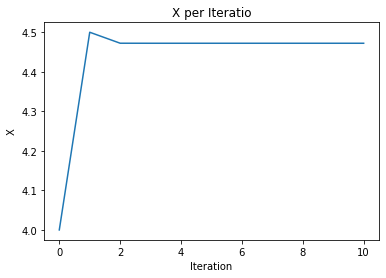

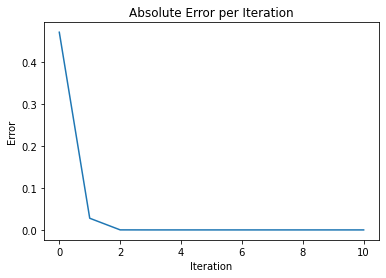

In [34]:
# Put your code here
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Xs)
plt.xlabel('Iteration')
plt.ylabel('X')
plt.title('X per Iteratio')

plt.figure()
plt.plot(error)
plt.title('Absolute Error per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')

&#9989; **Question 1.3: (1 points)** How many iterations does your code need to find the solution? 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

It looks like only about 3-4 iterations get into a good range of low error
 

---
## Part 2: Linear Regression (LR) as Optimization (7 points)

Yes, more on LR!

We have seen LR from the point of view of linear algebra and statistics - let's visualize LR as an optimization problem.

In this problem you will visualize LR as a brute force optimization problem. No linear algebra, no statistics! You don't need to know anything about the pseudoinverse or the covariance to find the best line through your data. And, since this is based on a brute force optimization, you can use this for **much more** than linear relationships.

&#9989; **Task 2.1: (2 points)** Make some fake data that is a line with a slope, intercept and add some (Gaussian/normal) noise.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fake data with a known slope and intercept
slope_true = 5
intercept_true = -7 
noise_stddev = 5

x_min, x_max, num_points = 0, 20, 100
x = np.linspace(x_min, x_max, num_points)
y_true = intercept_true + slope_true * x
y_data = y_true + np.random.normal(0, noise_stddev, len(x))


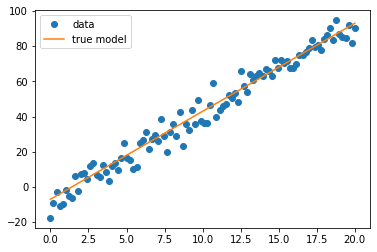

In [36]:
plt.plot(x, y_data, 'o', label='data')
plt.plot(x, y_true, label='true model')
plt.legend()

&#9989; **Task 2.2: (2 points)** Next, you are literally going to code up the MSE (mean squared error) and plot it.

That is, you will create the "loss function" that is being minimized for the curve fit, and you will actually look at it. This gives you a visual for the function the optimizer is attempting to minimize.

From the MSE "surface" you are going to use NumPy to find the lowest value. In general you would use a gradient descent type algorithm, but for a simple 2D problem we can just grab `argmin` from NumPy (more on that [here](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)).

Most of the code is given below - you just need to figure out how it works and play with it. Look for the questions and answer them 

Q1: The two arrays should the n_grid_points x n_grid_points. This is because they are meshgrids of the full range of the slope and intercept values.

Q2: The shape of y_predicted is the same as x. So it is a 1D array of length num_points.

Q3: unravel_index gives of the row and column index of the minimum value in the array. This is rather than np.argmin which gives the index of the flattened array.



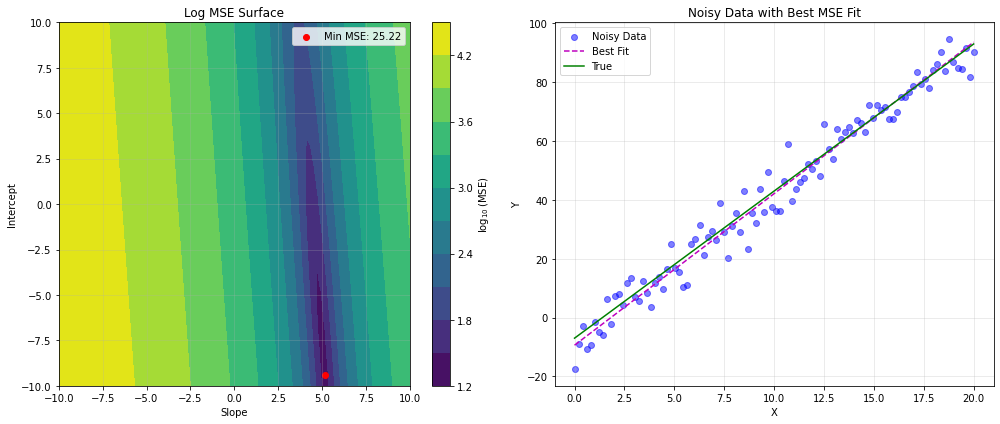

Minimum MSE: 25.22
Optimal Slope: 5.15
Optimal Intercept: -9.39


In [37]:
# Define a range of slope and intercept values
n_grid_points = 100
s_min, s_max = -10, 10
slope_range = np.linspace(s_min, s_max, n_grid_points)
i_min, i_max = -10, 10
intercept_range = np.linspace(i_min, i_max, n_grid_points)

# Create a grid of slope and intercept values
# Q1. What are the dimensions of these two arrays? 
slope_grid, intercept_grid = np.meshgrid(slope_range, intercept_range)

# Calculate the MSE for each combination of slope and intercept
mse = np.zeros_like(slope_grid)

for i in range(len(slope_range)):
    for j in range(len(intercept_range)):
        # Q2. What is the shape of y_predicted? 
        y_predicted = slope_grid[i, j] * x + intercept_grid[i, j]
        mse[i, j] = np.mean((y_data - y_predicted)**2) 

# Find the minimum MSE and corresponding slope and intercept values
# Q3. What does unravel_index do? Why don't I just use np.argmin?
min_idx = np.unravel_index(np.argmin(mse), mse.shape)
min_slope = slope_range[min_idx[1]]
min_intercept = intercept_range[min_idx[0]]
min_mse = mse[min_idx]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Contour plot of the MSE surface. Use the log because it is nicer to look at 
contour = axes[0].contourf(slope_grid, intercept_grid, np.log10(mse), levels=10, cmap='viridis')
fig.colorbar(contour, ax=axes[0], label=r'$\log_{10}({\rm MSE})$')

# Plot the minimum MSE point as a red dot
axes[0].scatter(min_slope, min_intercept, color='red', marker='o', label=f'Min MSE: {min_mse:.2f}')

axes[0].set_xlabel('Slope')
axes[0].set_ylabel('Intercept')
axes[0].set_title('Log MSE Surface')
axes[0].legend()
axes[0].grid(True, alpha = 0.3)

# Subplot 2: Noisy data with the best MSE values
y_optimal = min_slope * x + min_intercept
axes[1].scatter(x, y_data, label='Noisy Data', color='b', alpha=0.5)
axes[1].plot(x, y_optimal, '--' , label='Best Fit', color='m')
axes[1].plot(x, y_true, label='True', color='g')

axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Noisy Data with Best MSE Fit')
axes[1].legend()
axes[1].grid(alpha = 0.3)

plt.tight_layout()
plt.show()

print(f"Minimum MSE: {min_mse:.2f}")
print(f"Optimal Slope: {min_slope:.2f}")
print(f"Optimal Intercept: {min_intercept:.2f}")

As a bonus, here is a picture of the MSE as a surface plot in case you are less familiar with the image plot used above. This is how gradient descent methods "see" the function they are optimizing.

Notice how shallow the minimum is. This means that there are many potentially possible values of $m$ and $b$ that give a nearly equivalent fit as the "best" values. By looking at how shallow this function is, we get a sense for how much we can trust the parameters found from our fit.

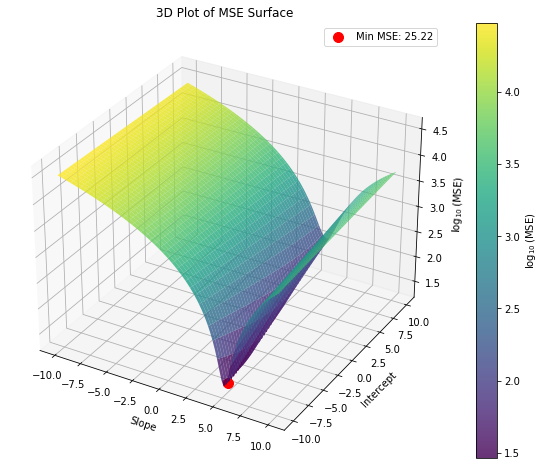

In [38]:
# Create a 3D plot of the MSE surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(slope_grid, intercept_grid, np.log10(mse), cmap='viridis', alpha=0.8)
fig.colorbar(surf, ax=ax, label=r'$\log_{10}({\rm MSE})$')

# Plot the minimum MSE point as a red dot
ax.scatter([min_slope], [min_intercept], [np.log10(min_mse)], color='red', marker='o', s=100, label=f'Min MSE: {min_mse:.2f}')

ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel(r'$\log_{10}({\rm MSE})$')
ax.set_title('3D Plot of MSE Surface')
ax.legend()
ax.grid(True)

From this plot we can see how lucky we are to only have a single minimum in our domain: any search algorithm would quickly converge to the correct minimum. Sadly, the real world is not always like this!

---
## Part 3: Linear Regression with Stochastic Gradient Descent (12 points)

Now that you have seen how to do LR with a simple `argmin` call, let's see how we would really do this in an ML setting. Finally, ML!

In general, our data will be too high dimensional to perform a brute force search. As you saw in the plots above, we could perform a gradient descent quite easily because the MSE function versus our parameters (slope and intercept) is convex. But, let's go one step further and do stochastic gradient descent (SGD), since that is more useful when we have datasets so large they don't fit into memory.


&#9989; **Task 3.1: (6 points)** In the cell below, complete the code by writing a function called `sgd_optimizer` that

- takes as input a data matrix `X`, a column vector `y`, the learning rate `eta`, the maximum number of iterations `max_iter`, and the size of the batch `batch_size`.
- initializes a set of weights `w` at random from a normal distribution
- loops over `max_iter` and at each epoch
- randomly selects `batch_size` values of `X` and `y`
- calls the `compute_gradient` function with `X[random_indices]`, `w`
- and uses the return from that function to update the weights `w` as $ w_{\rm new} = w_{\rm old} - \eta \nabla_w J
- returns the updated weights
      

In [39]:
def linear_model(X, w):
    return np.dot(X,w)

def mean_squared_error(y_true, y_prediction):
    ssr = 0.5 * (y_prediction - y_true )**2
    return ssr.mean()
    
def compute_gradient(X, y, weights):
    """Compute the gradient of the linear model using the MSE as the loss function"""
    
    predictions = linear_model(X, weights)
    # Check the slides to understand the code below
    gradient = np.dot(X.T, predictions - y) / len(X)  
    
    return gradient

def sgd_optimizer(X, y, eta=0.01, max_iter=1000, batch_size=10):
    # Initialize the weights from a normal distribution
    weights = np.random.randn(X.shape[1])
    # Loop over the epochs
    for epoch in range(max_iter):
        # Randomly select batch_size indices
        idx = np.random.choice(len(X), batch_size, replace=False) # choice from 0 to len(X) without replacement

        # Compute the gradient
        gradient = compute_gradient(X[idx],y[idx],weights)

        # Update the weights
        weights = weights - eta * gradient
    
    return weights

In [40]:
# Generate fake data with a known slope and intercept
slope_true = 2.0
intercept_true = 5.0
noise_stddev = 2.0
x = np.linspace(0, 10, 100)
y_true = intercept_true + slope_true * x
y_data = y_true + np.random.normal(0, noise_stddev, len(x))

# Create the data matrix
X_data = np.ones( (len(x), 2 ) )
X_data[:,1] = x

# Find the optimal weights
optimal_weights = sgd_optimizer(X_data, y_true, batch_size=5)

# Print the results
print("True Weights:", intercept_true, slope_true)
print("SGD Weights:", optimal_weights)


True Weights: 5.0 2.0
SGD Weights: [4.52981211 2.0739488 ]


&#9989; **Question 3.2: (2 points)** How do the SGD weights compare to the true ones?  

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

The SGD weights are somewhat close, definitely closer than the initial weights (random) but are still a bit off. Raising the number of iterations seem to make the answer become much closer
 

&#9989; **Question 3.3: (2 points)** The code below use the `SGDRegressor` from `sklearn`, however, it gives weird results. Why?

Coefficients: [2.49611266 2.00065956]
Intercept: [2.4991797]
MSE 2.8430150329733675e-06


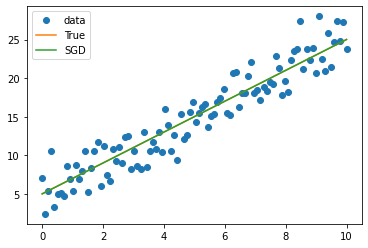

In [41]:
from sklearn.linear_model import SGDRegressor

# Create and train the model
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
model.fit(X_data, y_true)

# Get the weights (coefficients and intercept)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

print("MSE",mean_squared_error(y_true, model.predict(X_data)))

plt.plot(x, y_data, 'o', label='data')
plt.plot(x, y_true, label='True')
plt.plot(x, model.predict(X_data), label='SGD')
plt.legend();


In [42]:
# Create and train the model
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, fit_intercept=False)
model.fit(X_data, y_true)

# Get the weights (coefficients and intercept)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

mean_squared_error(y_true, model.predict(X_data))


Coefficients: [4.96718083 2.0045635 ]
Intercept: [0.]


0.0001385426685186597

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

The reason why we were getting an odd result was that the code was trying to fit another intercept ontop of the ones column we already had. Looking at the plot this still "gives us the right result" but ignoring the intercept column gives us an idea of the actual slope and intercept of the line.
 

&#9989; **Question 3.4: (2 points)** What if you wanted to use your optimizer for classification ? How would your code change if you were to use a logistic model to make predictions?

If we were to use a logistic model to make predictions, we would need to change the loss function to be the log loss function.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [43]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)